# NLP Assignment Submission

## Feed the following paragraph into your favourite data analytics tool, and answer the following:
a. What is the probability of the word “data” occurring in each line ?

b. What is the distribution of distinct word counts across all the lines ?

c. What is the probability of the word “analytics” occurring after the word “data” ?

==================================================================================

As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of either historical records or new information that has been processed for real-time analytics uses. In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content of non-numerical data like text, images, audio and video, including common phrases, themes and points of view.

==================================================================================


In [86]:
'''Import Required Packages'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import chain
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict, Counter

In [3]:
text = '''As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI)
, reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in 
nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter
is oriented to business uses,while data analytics has a broader focus. The expansive view of the term isn't universal, 
though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category.
Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing
campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals 
-- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's
analyzed can consist of either historical records or new information that has been processed for real-time analytics uses.
In addition, it can come from a mix of internal systems and external data sources. At a high level, data analytics methodologies
include exploratory data analysis (EDA), which aims to find patterns and relationships in data, and confirmatory data analysis
(CDA), which applies statistical techniques to determine whether hypotheses about a data set are true or false. EDA is often
compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn
by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also be separated into quantitative
data analysis and qualitative data analysis. The former involves analysis of numerical data with quantifiable variables that can
be compared or measured statistically. The qualitative approach is more interpretive -- it focuses on understanding the content
of non-numerical data like text, images, audio and video, including common phrases, themes and points of view.'''

In [4]:
sentence = nltk.sent_tokenize(text) 
'''Article to sentence tokenization'''
print(sentence)

['As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI)\n, reporting and online analytical processing (OLAP) to various forms of advanced analytics.', "In that sense, it's similar in \nnature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter\nis oriented to business uses,while data analytics has a broader focus.", "The expansive view of the term isn't universal, \nthough: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category.", 'Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing\ncampaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals \n-- all with the ultimate goal of boosting business performance.', "Depending on the particular application, the data that's\n

In [5]:
token = [word_tokenize(sentence[i].lower()) for i in range(len(sentence))]
'''Tokenization by Sentences'''
print(token)

[['as', 'a', 'term', ',', 'data', 'analytics', 'predominantly', 'refers', 'to', 'an', 'assortment', 'of', 'applications', ',', 'from', 'basic', 'business', 'intelligence', '(', 'bi', ')', ',', 'reporting', 'and', 'online', 'analytical', 'processing', '(', 'olap', ')', 'to', 'various', 'forms', 'of', 'advanced', 'analytics', '.'], ['in', 'that', 'sense', ',', 'it', "'s", 'similar', 'in', 'nature', 'to', 'business', 'analytics', ',', 'another', 'umbrella', 'term', 'for', 'approaches', 'to', 'analyzing', 'data', '--', 'with', 'the', 'difference', 'that', 'the', 'latter', 'is', 'oriented', 'to', 'business', 'uses', ',', 'while', 'data', 'analytics', 'has', 'a', 'broader', 'focus', '.'], ['the', 'expansive', 'view', 'of', 'the', 'term', 'is', "n't", 'universal', ',', 'though', ':', 'in', 'some', 'cases', ',', 'people', 'use', 'data', 'analytics', 'specifically', 'to', 'mean', 'advanced', 'analytics', ',', 'treating', 'bi', 'as', 'a', 'separate', 'category', '.'], ['data', 'analytics', 'init

In [6]:
unigram = list(chain.from_iterable(token))
'''Converting tokens list of list in a single list'''
print(unigram)

['as', 'a', 'term', ',', 'data', 'analytics', 'predominantly', 'refers', 'to', 'an', 'assortment', 'of', 'applications', ',', 'from', 'basic', 'business', 'intelligence', '(', 'bi', ')', ',', 'reporting', 'and', 'online', 'analytical', 'processing', '(', 'olap', ')', 'to', 'various', 'forms', 'of', 'advanced', 'analytics', '.', 'in', 'that', 'sense', ',', 'it', "'s", 'similar', 'in', 'nature', 'to', 'business', 'analytics', ',', 'another', 'umbrella', 'term', 'for', 'approaches', 'to', 'analyzing', 'data', '--', 'with', 'the', 'difference', 'that', 'the', 'latter', 'is', 'oriented', 'to', 'business', 'uses', ',', 'while', 'data', 'analytics', 'has', 'a', 'broader', 'focus', '.', 'the', 'expansive', 'view', 'of', 'the', 'term', 'is', "n't", 'universal', ',', 'though', ':', 'in', 'some', 'cases', ',', 'people', 'use', 'data', 'analytics', 'specifically', 'to', 'mean', 'advanced', 'analytics', ',', 'treating', 'bi', 'as', 'a', 'separate', 'category', '.', 'data', 'analytics', 'initiatives

In [7]:
bi_gram = [nltk.ngrams(token[i], 2) for i in range(len(token))]

'''Converting unigram tokens into bigram'''

bigram = list(chain.from_iterable(bi_gram))

print(bigram)

[('as', 'a'), ('a', 'term'), ('term', ','), (',', 'data'), ('data', 'analytics'), ('analytics', 'predominantly'), ('predominantly', 'refers'), ('refers', 'to'), ('to', 'an'), ('an', 'assortment'), ('assortment', 'of'), ('of', 'applications'), ('applications', ','), (',', 'from'), ('from', 'basic'), ('basic', 'business'), ('business', 'intelligence'), ('intelligence', '('), ('(', 'bi'), ('bi', ')'), (')', ','), (',', 'reporting'), ('reporting', 'and'), ('and', 'online'), ('online', 'analytical'), ('analytical', 'processing'), ('processing', '('), ('(', 'olap'), ('olap', ')'), (')', 'to'), ('to', 'various'), ('various', 'forms'), ('forms', 'of'), ('of', 'advanced'), ('advanced', 'analytics'), ('analytics', '.'), ('in', 'that'), ('that', 'sense'), ('sense', ','), (',', 'it'), ('it', "'s"), ("'s", 'similar'), ('similar', 'in'), ('in', 'nature'), ('nature', 'to'), ('to', 'business'), ('business', 'analytics'), ('analytics', ','), (',', 'another'), ('another', 'umbrella'), ('umbrella', 'term

In [8]:
from collections import Counter

count_unigram = Counter(unigram)

print('Count of token "data" : ' , count_unigram['data'])

print(count_unigram)

Count of token "data" :  18
Counter({',': 23, 'data': 18, 'to': 11, '.': 11, 'the': 11, 'a': 10, 'analytics': 10, 'of': 10, 'and': 9, 'in': 6, 'analysis': 6, 'is': 5, 'can': 5, 'business': 4, '(': 4, ')': 4, 'that': 4, '--': 4, 'or': 4, 'term': 3, 'it': 3, 'with': 3, 'as': 2, 'from': 2, 'bi': 2, 'advanced': 2, 'for': 2, 'uses': 2, 'while': 2, 'has': 2, 'view': 2, 'more': 2, 'on': 2, 'exploratory': 2, 'eda': 2, 'which': 2, 'cda': 2, 'compared': 2, 'work': 2, 'be': 2, 'qualitative': 2, 'predominantly': 1, 'refers': 1, 'an': 1, 'assortment': 1, 'applications': 1, 'basic': 1, 'intelligence': 1, 'reporting': 1, 'online': 1, 'analytical': 1, 'processing': 1, 'olap': 1, 'various': 1, 'forms': 1, 'sense': 1, "'s": 1, 'similar': 1, 'nature': 1, 'another': 1, 'umbrella': 1, 'approaches': 1, 'analyzing': 1, 'difference': 1, 'latter': 1, 'oriented': 1, 'broader': 1, 'focus': 1, 'expansive': 1, "n't": 1, 'universal': 1, 'though': 1, ':': 1, 'some': 1, 'cases': 1, 'people': 1, 'use': 1, 'specificall

In [9]:
count_bigram = Counter(bigram)

print('Count of token "data, analytics" : ' , count_bigram['data', 'analytics'])

print(count_bigram)

Count of token "data, analytics" :  6
Counter({('data', 'analytics'): 6, ('data', 'analysis'): 5, (')', ','): 3, ('as', 'a'): 2, (',', 'data'): 2, ('advanced', 'analytics'): 2, (',', 'it'): 2, ('to', 'business'): 2, ('analytics', ','): 2, ('with', 'the'): 2, (',', 'while'): 2, ('exploratory', 'data'): 2, ('analysis', '('): 2, (',', 'which'): 2, ('analysis', '.'): 2, ('a', 'term'): 1, ('term', ','): 1, ('analytics', 'predominantly'): 1, ('predominantly', 'refers'): 1, ('refers', 'to'): 1, ('to', 'an'): 1, ('an', 'assortment'): 1, ('assortment', 'of'): 1, ('of', 'applications'): 1, ('applications', ','): 1, (',', 'from'): 1, ('from', 'basic'): 1, ('basic', 'business'): 1, ('business', 'intelligence'): 1, ('intelligence', '('): 1, ('(', 'bi'): 1, ('bi', ')'): 1, (',', 'reporting'): 1, ('reporting', 'and'): 1, ('and', 'online'): 1, ('online', 'analytical'): 1, ('analytical', 'processing'): 1, ('processing', '('): 1, ('(', 'olap'): 1, ('olap', ')'): 1, (')', 'to'): 1, ('to', 'various'): 1, 

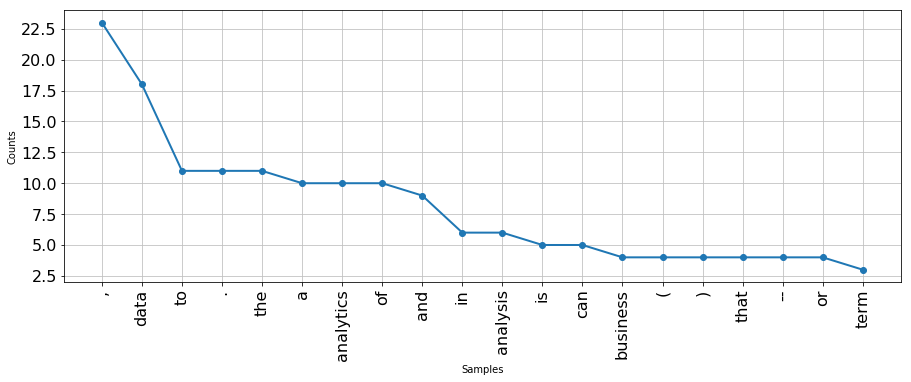

In [10]:
fdist_unigram = FreqDist(unigram)

'''Top 20 words of unigram tokens based on frequency distribution'''

plt.figure(figsize = (15,5))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
fdist_unigram.plot(20, marker = 'o')
plt.show()


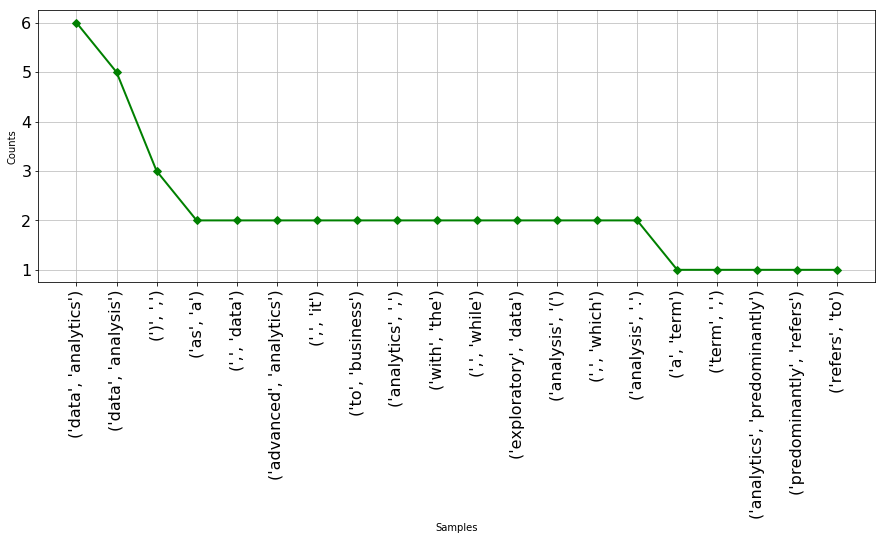

In [11]:
fdist_bigram = FreqDist(bigram)

'''Top 20 words of unigram tokens based on frequency distribution'''

plt.figure(figsize = (15,5))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
fdist_bigram.plot(20, marker = 'D', color = 'g')

In [76]:
'''Creating dictionary and Corpus from token'''
dictionary = Dictionary(token)
print('Token_id: \n \n',dictionary.token2id)
 

''' Token_id of token "data" '''
data_id = dictionary.token2id.get('data')
print('\n data_id: ',data_id)


''' Token_id of token "analytics" '''
analytics_id = dictionary.token2id.get('analytics')
print('\n analytics_id: ',analytics_id)


Token_id: 
 
 {'(': 0, ')': 1, ',': 2, '.': 3, 'a': 4, 'advanced': 5, 'an': 6, 'analytical': 7, 'analytics': 8, 'and': 9, 'applications': 10, 'as': 11, 'assortment': 12, 'basic': 13, 'bi': 14, 'business': 15, 'data': 16, 'forms': 17, 'from': 18, 'intelligence': 19, 'of': 20, 'olap': 21, 'online': 22, 'predominantly': 23, 'processing': 24, 'refers': 25, 'reporting': 26, 'term': 27, 'to': 28, 'various': 29, "'s": 30, '--': 31, 'analyzing': 32, 'another': 33, 'approaches': 34, 'broader': 35, 'difference': 36, 'focus': 37, 'for': 38, 'has': 39, 'in': 40, 'is': 41, 'it': 42, 'latter': 43, 'nature': 44, 'oriented': 45, 'sense': 46, 'similar': 47, 'that': 48, 'the': 49, 'umbrella': 50, 'uses': 51, 'while': 52, 'with': 53, ':': 54, 'cases': 55, 'category': 56, 'expansive': 57, 'mean': 58, "n't": 59, 'people': 60, 'separate': 61, 'some': 62, 'specifically': 63, 'though': 64, 'treating': 65, 'universal': 66, 'use': 67, 'view': 68, 'all': 69, 'boosting': 70, 'businesses': 71, 'campaigns': 72, 'ca

In [13]:
'''Creating Corpus from dictionary from token'''
token_corpus = [dictionary.doc2bow(token) for token in token]
corpus = sorted(token_corpus, key = lambda x:x[1], reverse = True)

In [14]:
total_word_count = defaultdict(int)

for word_id, word_count in chain.from_iterable(corpus):
    total_word_count[dictionary.get(word_id)] += 1
    
print(total_word_count)

defaultdict(<class 'int'>, {'.': 11, 'data': 11, 'of': 8, 'that': 3, 'the': 7, 'with': 3, 'can': 5, 'or': 4, 'analysis': 4, 'compared': 2, 'be': 2, 'former': 1, 'involves': 1, 'measured': 1, 'numerical': 1, 'quantifiable': 1, 'statistically': 1, 'variables': 1, 'analytics': 7, 'and': 6, 'also': 1, 'into': 1, 'qualitative': 2, 'quantitative': 1, 'separated': 1, ',': 9, 'a': 7, 'business': 3, 'term': 3, 'to': 6, "'s": 1, '--': 4, 'analyzing': 1, 'another': 1, 'approaches': 1, 'broader': 1, 'difference': 1, 'focus': 1, 'for': 2, 'has': 2, 'in': 5, 'is': 4, 'it': 3, 'latter': 1, 'nature': 1, 'oriented': 1, 'sense': 1, 'similar': 1, 'umbrella': 1, 'uses': 2, 'while': 2, 'advanced': 2, 'as': 2, 'bi': 2, ':': 1, 'cases': 1, 'category': 1, 'expansive': 1, 'mean': 1, "n't": 1, 'people': 1, 'separate': 1, 'some': 1, 'specifically': 1, 'though': 1, 'treating': 1, 'universal': 1, 'use': 1, 'view': 2, 'all': 1, 'boosting': 1, 'businesses': 1, 'campaigns': 1, 'competitive': 1, 'customer': 1, 'edge':

# Vectorizing tokens using SkLearn
## Crreating Sparse Matrix for tokens

    1977  about  addition  advanced  aims  akin  all  also  an  analysis  ...  \
0      0      0         0         1     0     0    0     0   1         0  ...   
1      0      0         0         0     0     0    0     0   0         0  ...   
2      0      0         0         1     0     0    0     0   0         0  ...   
3      0      0         0         0     0     0    1     0   0         0  ...   
4      0      0         0         0     0     0    0     0   0         0  ...   
5      0      0         1         0     0     0    0     0   0         0  ...   
6      0      1         0         0     1     0    0     0   0         2  ...   
7      1      0         0         0     0     1    0     0   0         1  ...   
8      0      0         0         0     0     0    0     1   0         2  ...   
9      0      0         0         0     0     0    0     0   0         1  ...   
10     0      0         0         0     0     0    0     0   0         0  ...   

    uses  variables  variou

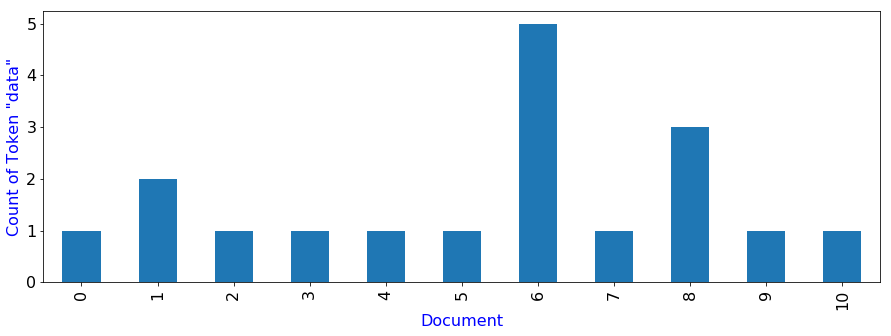

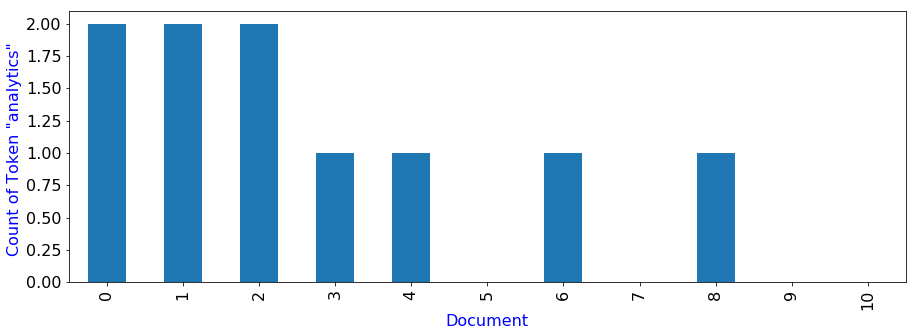

In [15]:
vect = CountVectorizer()
vect
fit = vect.fit_transform(sentence)
vect.get_feature_names()
fit.toarray()
df = pd.DataFrame(fit.toarray(), columns = vect.get_feature_names())

print(df)

df.data.sum()

df.analytics.sum()

plt.figure(figsize = (15,5))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Count of Token "data"', fontsize = 16, color = 'b')
plt.xlabel('Document', fontsize = 16, color = 'b')
df.data.plot(kind = 'bar')
plt.show()

plt.figure(figsize = (15,5))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Count of Token "analytics" ', fontsize = 16, color = 'b')
plt.xlabel('Document', fontsize = 16, color = 'b')
df.analytics.plot(kind = 'bar')
plt.show()

## a. What is the probability of the word “data” occurring in each line ?

In [18]:
'''Calculating length of doucument'''

len_document = [len(token[i]) for i in range(len(token))]

print('length of document: ', len_document)

data_count = df.data

'''Proability of word "data" occuring in each line'''

p_data = data_count/len_document

print('\n Proability of word "data" occuring in each line: \n \n', p_data)


length of document:  [37, 42, 33, 46, 28, 17, 51, 42, 15, 18, 35]

 Proability of word "data" occuring in each line: 
 
 0     0.027027
1     0.047619
2     0.030303
3     0.021739
4     0.035714
5     0.058824
6     0.098039
7     0.023810
8     0.200000
9     0.055556
10    0.028571
Name: data, dtype: float64


## b. What is the distribution of distinct word counts across all the lines ?

In [55]:
'''Sorting unigram count'''

sorted_unigram = sorted(count_unigram.items(), key = lambda x: x[1], reverse = True)

'''token distribution'''
print('Distinct word count: \n', fdist_unigram.most_common(50))

for word_id, word_count in sorted_unigram:
    print(word_id, word_count)

Distinct word count: 
 [(',', 23), ('data', 18), ('to', 11), ('.', 11), ('the', 11), ('a', 10), ('analytics', 10), ('of', 10), ('and', 9), ('in', 6), ('analysis', 6), ('is', 5), ('can', 5), ('business', 4), ('(', 4), (')', 4), ('that', 4), ('--', 4), ('or', 4), ('term', 3), ('it', 3), ('with', 3), ('as', 2), ('from', 2), ('bi', 2), ('advanced', 2), ('for', 2), ('uses', 2), ('while', 2), ('has', 2), ('view', 2), ('more', 2), ('on', 2), ('exploratory', 2), ('eda', 2), ('which', 2), ('cda', 2), ('compared', 2), ('work', 2), ('be', 2), ('qualitative', 2), ('predominantly', 1), ('refers', 1), ('an', 1), ('assortment', 1), ('applications', 1), ('basic', 1), ('intelligence', 1), ('reporting', 1), ('online', 1)]
, 23
data 18
to 11
. 11
the 11
a 10
analytics 10
of 10
and 9
in 6
analysis 6
is 5
can 5
business 4
( 4
) 4
that 4
-- 4
or 4
term 3
it 3
with 3
as 2
from 2
bi 2
advanced 2
for 2
uses 2
while 2
has 2
view 2
more 2
on 2
exploratory 2
eda 2
which 2
cda 2
compared 2
work 2
be 2
qualitative 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9D7400>,
      dtype=object)

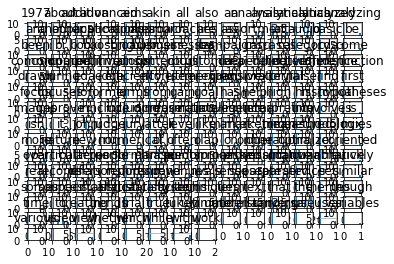

Text(0, 0.5, 'Frequency of word count')

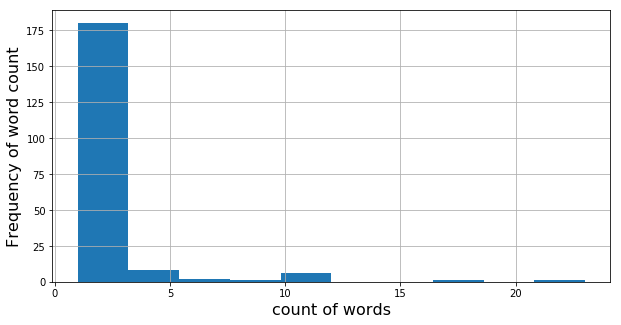

In [97]:
values = pd.Series(sorted(count_unigram.values(), reverse = True))

'''Distribution of words across all line'''
plt.figure(figsize = (10,5))
values.hist()
plt.xlabel('count of words', fontsize = 16)
plt.ylabel('Frequency of word count', fontsize = 16)

## c. What is the probability of the word “analytics” occurring after the word “data” ?

In [98]:
'''Bigram Count Vectorizer'''
bigram_vectorizer = CountVectorizer(ngram_range = (1,2))
bi_fit = bigram_vectorizer.fit_transform(sentence)
bigram_vectorizer.get_feature_names()
bi_fit.toarray()
bi_fit.shape

bi_df = pd.DataFrame(bi_fit.toarray(), columns = bigram_vectorizer.get_feature_names())
bi_df.columns[100:150]

col = ['data analysis', 'data analytics', 'data and', 'data like','data set','data sources', 'data that', 'data with']

bi_df[col].sum().sum()


p_data_analytics = bi_df['data analytics'].sum()/bi_df[col].sum().sum()

print(p_data_analytics)

0.3333333333333333
